## 手書き文字認識 

* CNNで学習、予測 
* モデルを保存 
* 実際の手書き文字を予測 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras import models, layers, callbacks
from keras.utils import np_utils


2022-10-10 11:57:01.495388: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


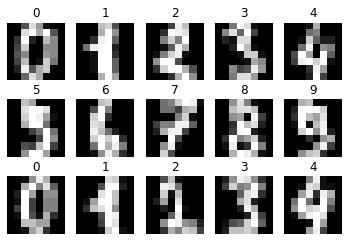

In [2]:
#データの読み込み
digits=datasets.load_digits()

#データの確認
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")
    
plt.show()

In [3]:
#0は黒、16は白
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [7]:
#正規化する0-1
# X=digits.images/16
X=digits.images

In [8]:
#モデルで学習させる

#データの用意
#目的変数は質的変数なのでone-hotエンコーディングの必要がある
X_data=X.reshape((-1,64))
y_data=np_utils.to_categorical(digits.target)

#学習用とテスト用に分割
X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, test_size=0.2, random_state=20221010)

In [9]:
#アーキテクチャの構築
#入力層64, 中間層16, 出力層10
clf=models.Sequential()
clf.add(layers.Dense(64, input_shape=(64,)))
clf.add(layers.Activation('relu'))
clf.add(layers.Dense(32, input_shape=(16,)))
clf.add(layers.Activation('relu'))
clf.add(layers.Dropout(0.25))
clf.add(layers.Dense(10))
clf.add(layers.Activation('softmax'))

#コンパイル
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#early_stopping
cb_es=callbacks.EarlyStopping(
    monitor='loss',
    patience=10,
    restore_best_weights=True
)

clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
 activation_5 (Activation)   (None, 10)               

In [10]:
#学習
history=clf.fit(X_train, y_train, epochs=100, verbose=1,callbacks=cb_es)

Epoch 1/100
45/45 [==============================] - 1s 2ms/step - loss: 3.1885 - accuracy: 0.2575
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 1.3336 - accuracy: 0.5233
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.9454 - accuracy: 0.6778
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.7787
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.8058
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8483
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8594
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8970
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.9186
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9095
Epoch 11/

In [11]:
loss, accuracy=clf.evaluate(X_test, y_test, verbose=0)
print('損失：',loss)
print('正解率：', accuracy)

損失： 0.05262448638677597
正解率： 0.9777777791023254


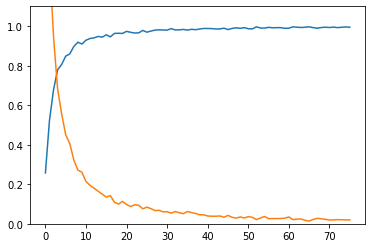

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylim(0.0, 1.1)

plt.show()

In [13]:
#学習済みモデルの保存
import pickle
with open("digits.pkl", "wb") as fp:
    pickle.dump(clf, fp)

INFO:tensorflow:Assets written to: ram://025897e4-4382-49dd-9ad7-b4f72d5843fb/assets


In [14]:
#学習済みモデルの読み込み
with open("digits.pkl", "rb") as fp:
    clf1=pickle.load(fp)

loss, accuracy=clf1.evaluate(X_test, y_test, verbose=0)
print('損失：',loss)
print('正解率：', accuracy)

損失： 0.05262448638677597
正解率： 0.9777777791023254
